In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix , accuracy_score 

In [5]:
#source of dataset 
# https://www.kaggle.com/datasets/datasnaek/chess 

In [6]:
chess_df = pd.read_csv('/content/games.csv')
print("dataset size : ",chess_df.shape)
print("dataset dimension :",chess_df.ndim)
dtypes  = []
column = chess_df.columns.values.tolist()
for _column in range(chess_df.shape[1]):
     dtypes.append(chess_df.iloc[:,_column].dtype)
print(dtypes)
print(column)

dataset size :  (20058, 16)
dataset dimension : 2
[dtype('O'), dtype('bool'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64')]
['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


In [7]:
chess_df.sample(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
10841,xOwenYaO,False,1.409258e+12,1.409263e+12,87,mate,white,180+0,tylik,1507,beastly,927,e4 h5 d4 g6 f4 Bh6 c4 Nf6 e5 Ng8 d5 Bg7 e6 fxe...,B00,Goldsmith Defense,2
14543,5n85XdMR,False,1.504261e+12,1.504262e+12,47,mate,white,10+0,chenla,1427,romanar2006,1493,e4 e5 Nf3 Nc6 Bb5 a6 Bxc6 dxc6 O-O Nf6 Nxe5 Qd...,C69,Ruy Lopez: Exchange Variation | Normal Variation,9
15570,aZEeEdpV,True,1.488912e+12,1.488913e+12,62,mate,black,10+0,dana1971,1533,lemarktwainkie,1430,d4 d5 c4 dxc4 e3 Nc6 Bxc4 e5 Qf3 f6 Bd3 exd4 Q...,D20,Queen's Gambit Accepted: Old Variation,5
17423,6CnnA3Md,True,1.476378e+12,1.476379e+12,42,mate,black,6+10,gunsti,1716,mukrisp,1582,e4 e5 Nf3 d6 d4 exd4 Nxd4 Nc6 Nc3 Bd7 Be3 Nf6 ...,C41,Philidor Defense: Exchange Variation #2,7
7440,Knf3emIV,True,1.480570e+12,1.480570e+12,12,resign,black,5+8,sayul,1500,thatguythatistr,1543,e4 c5 Bc4 Nc6 Qh5 e6 Bb5 Nf6 Qf3 Nd4 Qb3 Nxb3,B20,Sicilian Defense: Bowdler Attack,3


In [8]:
chess_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [9]:
isThereMissingValues = chess_df.isnull().sum().sort_values(ascending=False)
print(isThereMissingValues)

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [10]:
def isNan(string):
     return string != string
# define most_frequent_element_in_columns mfeic
 mfeic = [[0]*chess_df.shape[0]]*chess_df.shape[1]
 items = []
 for i in range(chess_df.shape[1]):
     items.append({})
    
 for j in range(chess_df.shape[1]):
     for i,value in enumerate(chess_df.iloc[:,j]):
          if not isNan(value):
             items[j].setdefault(value,i)

 for j in range(chess_df.shape[0]):
     for i in range(chess_df.shape[1]):
        idx = items[i][chess_df.iloc[j,i]]
        mfeic[i][idx] += 1
 # print(max(mfeic[0]))
 # print(items)
 print(mfeic[1])

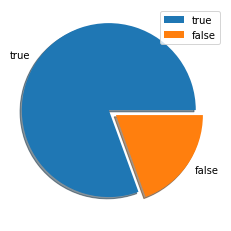

In [11]:
#visualization 
# as datatype is boolean for rated column 
count_true = count_false = 0
for i,value in enumerate(chess_df['rated']):
    if value: count_true += 1
    else: count_false += 1
tab      = [count_true,count_false]
label    = ["true","false"]
_explode = [0.1,0]
plt.pie(tab,labels=label,explode=_explode,shadow=True)
plt.legend()
plt.show()
# print(count_false)


In [12]:
# introduce bias in mean 
def GD(X,y):
    """
      X,y   - numpy arrays
      w     - weight bias
      alpha - hyper parameter
      epochs- hope to get convergence in million iterations
    """
    _ones  = np.ones([X.shape[0],1])
    X      = np.array([X])
    X      = X.T
    X      = np.concatenate((_ones,X),axis=1)
    y      = np.array(y)
    w      = np.zeros([1,X.shape[1]])
    alpha  = 0.01
    epochs = int(1e6)
    for iter in range(epochs):
       y_Error = X@w.T - y
       w       = w - (alpha/X.shape[0])*(np.sum(y_Error*X,axis=0))
    return w

def calc_WMean(X,w):
    return (X*w)/X.shape[0]

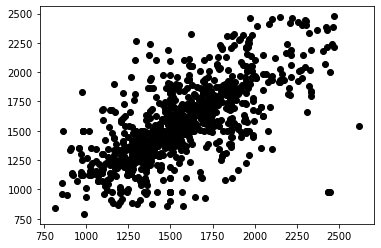

In [13]:
chess_df_sample = chess_df.iloc[:1000,:]

X = np.array([chess_df_sample['white_rating']])
y = np.array([chess_df_sample['black_rating']])
_model = LinearRegression()
_model.fit(X,y)
Y = _model.predict(np.array([chess_df_sample['white_rating']]))

plt.scatter(chess_df_sample['white_rating'],chess_df_sample['black_rating'],color='black')
plt.show()
#linear relationship - can say competitions are fair as almost similar rated participants are competing
# W = GD(chess_df_sample['white_rating'],chess_df_sample['black_rating'])

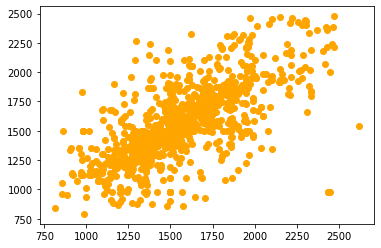

In [14]:
plt.scatter(X[0],Y[0],color='orange')
plt.show()

In [15]:
rated_contest  = chess_df[chess_df['rated']==True]
unrated_contest= chess_df[chess_df['rated']==False]

In [16]:
victory_state_values = set()
for eachAttr in chess_df['victory_status']:
     victory_state_values.add(eachAttr)
print(victory_state_values)
"""
victory state  , rated , winner categorical attributes
created_at , last_move_at , white_rating , black_rating linearaly related attributes [strong linear relationship]
turns , opening_eco , rating to decide winner category
opening_eco , opening_name identical as game point of view so opening_name can be dropped
another has to be identified can be continuos but relationship isn't linear
"""

{'outoftime', 'mate', 'resign', 'draw'}


"\nvictory state  , rated , winner categorical attributes\ncreated_at , last_move_at , white_rating , black_rating linearaly related attributes [strong linear relationship]\nturns , opening_eco , rating to decide winner category\nopening_eco , opening_name identical as game point of view so opening_name can be dropped\nanother has to be identified can be continuos but relationship isn't linear\n"

In [17]:
# dropping unnecessory column 
chess_df = chess_df.drop('opening_name',axis='columns')

In [18]:
runTime = []
for i,value in enumerate(chess_df['created_at']):
    runTime.append(chess_df.loc[i,'last_move_at']-value)
print(runTime)
# interested in total runtime of game so nothing to do with when started and when it was ended
# dropping created_at , last_move_at and creating new column RunTime 
chess_df = chess_df.drop('created_at',axis='columns')
chess_df = chess_df.drop('last_move_at',axis='columns')
chess_df['RunTime'] = runTime
chess_df.head(5)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 10000000.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000000.0, 10000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_ply,RunTime
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,0.0
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,0.0
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,0.0
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,0.0
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,0.0


In [19]:
# chess_df.fillna(chess_df.mean())
# chess_df.fillna(chess_df.std())
chess_df_interPolate = chess_df.interpolate(method='quadratic',limit_direction='forward')

In [20]:
generateBins = [] # for turns column
bins = [np.zeros((4011,5)),np.zeros((4011,5)),np.zeros((4011,5))]
bin  = np.zeros(chess_df.shape[0])
for i,value in enumerate(chess_df['turns']):
    bin[i] = value
bin  = np.sort(bin)
for i in range(0,chess_df.shape[0]-5,5):
    k     = int(i/5)
    _mean = (bin[i]+bin[i+1]+bin[i+2]+bin[i+3]+bin[i+4])/5 
    for j in range(5):
        for x in range(3):
           bins[x][k,j] = _mean
print(bins)

[array([[  1. ,   1. ,   1. ,   1. ,   1. ],
       [  1. ,   1. ,   1. ,   1. ,   1. ],
       [  1. ,   1. ,   1. ,   1. ,   1. ],
       ...,
       [208. , 208. , 208. , 208. , 208. ],
       [213.2, 213.2, 213.2, 213.2, 213.2],
       [229.2, 229.2, 229.2, 229.2, 229.2]]), array([[  1. ,   1. ,   1. ,   1. ,   1. ],
       [  1. ,   1. ,   1. ,   1. ,   1. ],
       [  1. ,   1. ,   1. ,   1. ,   1. ],
       ...,
       [208. , 208. , 208. , 208. , 208. ],
       [213.2, 213.2, 213.2, 213.2, 213.2],
       [229.2, 229.2, 229.2, 229.2, 229.2]]), array([[  1. ,   1. ,   1. ,   1. ,   1. ],
       [  1. ,   1. ,   1. ,   1. ,   1. ],
       [  1. ,   1. ,   1. ,   1. ,   1. ],
       ...,
       [208. , 208. , 208. , 208. , 208. ],
       [213.2, 213.2, 213.2, 213.2, 213.2],
       [229.2, 229.2, 229.2, 229.2, 229.2]])]


In [21]:
#outliears for white_rating , black_rating 
chess_white_rating = chess_df['white_rating']
chess_black_rating = chess_df['black_rating'] 

QW1      = chess_white_rating.quantile(q=.25)
QW3      = chess_white_rating.quantile(q=.75)
whiteIQR = QW3 - QW1 
print(whiteIQR)

QB1      = chess_black_rating.quantile(q=.25)
QB3      = chess_black_rating.quantile(q=.75)
blackIQR = QB3 - QB1 
print(blackIQR)


whiteOutliers = blackOutliers = []
for i,value in enumerate(chess_white_rating):
         if value < QW1 - whiteIQR*1.5 or value > QW3 + 1.5*whiteIQR:
            whiteOutliers.append(value)
            chess_white_rating[i] = chess_white_rating.mean()
for j,value in enumerate(chess_white_rating):
         if value < QB1 - blackIQR*1.5 or value > QB3 + 1.5*blackIQR:
            blackOutliers.append(value)
            chess_black_rating[j] = chess_black_rating.mean()
print(whiteOutliers)
print(blackOutliers)

395.0
393.0
[2449, 2443, 2436, 2436, 2422, 2474, 2469, 2465, 2460, 2447, 2432, 2428, 2418, 2409, 2621, 784, 798, 2419, 795, 2404, 2422, 2458, 2415, 2420, 2513, 2469, 2621, 2440, 2432, 2409, 2489, 2489, 2621, 2430, 2401, 2451, 2621, 2617, 2473, 2401, 2493, 2586, 2430, 2622, 2475, 788, 801, 784, 2426, 2413, 2621, 2452, 2522, 2621, 2438, 2438, 2411, 2621, 2621, 2621, 2465, 2401, 2447, 2621, 2621, 2406, 2398, 2621, 2403, 2454, 2403, 2449, 2387, 2387, 2524, 2392, 2447, 2522, 2452, 2485, 2426, 2400, 2404, 2621, 2621, 2400, 2400, 2422, 2500, 2621, 2621, 2621, 2621, 2401, 2401, 2619, 2700, 2445, 2393, 2438, 2438, 2438, 2438, 2438, 2438, 2454, 2426, 2413, 2621, 2549, 2621, 2621, 2621, 2473, 2386, 2524, 2619, 793, 2403, 2454, 798, 2419, 2579, 2574, 2500, 2613, 2406, 2621, 2430, 2477, 2477, 2443, 2621, 2454, 2549, 2384, 2382, 2376, 2384]
[2449, 2443, 2436, 2436, 2422, 2474, 2469, 2465, 2460, 2447, 2432, 2428, 2418, 2409, 2621, 784, 798, 2419, 795, 2404, 2422, 2458, 2415, 2420, 2513, 2469, 2621, 2

<ipython-input-21-629d7208c229>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chess_white_rating[i] = chess_white_rating.mean()
<ipython-input-21-629d7208c229>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chess_black_rating[j] = chess_black_rating.mean()


{'whiskers': [<matplotlib.lines.Line2D at 0x7f02ce3176a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02cba92550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02ce317880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02cba92430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02cbaeaa60>],
 'means': []}

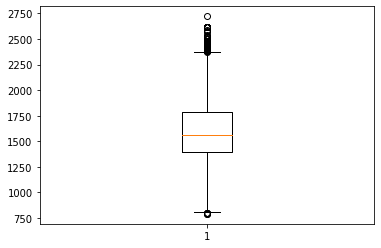

In [22]:
plt.boxplot(chess_df['black_rating'])

In [23]:
#min-max normalization
# chess_df = (chess_df - chess_df.min())/(chess_df.max()-chess_df.min())
#z-score normalization
chess_df_copy = chess_df
chess_df_copy = (chess_df_copy - chess_df_copy.mean())/chess_df_copy.std()
# #decimal normalization
# chess_df = (chess_df)/pow(10,3)

<ipython-input-23-166acb48549d>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chess_df_copy = (chess_df_copy - chess_df_copy.mean())/chess_df_copy.std()


In [55]:
# ALGORITHMS 
def KMeans(X,
           k,
           _threshold,
           _epochs
          ):
    centroids = dict()
    for i in range(k):
        rand = np.random.randint(0,X.shape[0],1)
        prev_rand = rand 
        rand = np.random.randint(0,X.shape[0],1)
        centroids.setdefault(i,max(X[rand[0]],X[prev_rand[0]])) #init centroid points
    for i in range(_epochs):
        threshold_distances  = dict()
        for j in range(k):
            threshold_distances.setdefault(j,[])
        for data_point in X: #adding closest data_points in data structure
            distances = [np.linalg.norm(data_point-centroids[_centroid]) for _centroid in centroids] #reference 1
            threshold_distance = distances.index(min(distances)) 
            threshold_distances[threshold_distance].append(data_point)
        
        prev_centroids = dict(centroids) #recording previous centroids to check evolution of model
        for _threshold_distance in threshold_distances:
            centroids[_threshold_distance] = np.average(threshold_distances[_threshold_distance]) #calculating new centroid
        
        isOptimized = True
        for _centroid in centroids:
            prev_centroid = prev_centroids[_centroid] 
            cur_centroid  = centroids[_centroid]
            if np.sum((cur_centroid-prev_centroid)/(prev_centroid*1e2) > _threshold):
                     isOptimized = False 
        if isOptimized: 
           return centroids,threshold_distances 

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def sigmoid(X): return 1/(1+np.exp(-X)) 
def sigmoid_dy(X): return X*(1-X)
def feed_forward(X,w,b):
    return sigmoid(np.dot(X,w) + b)
def neural_network(
    X, 
    y, 
    layer,
    epochs,
    _alpha
):
    """
        X     : input data
        y     : output data
        layer : a list containing information about number of neurons in each layer
        epochs: number of iterations to approach convergence
        _alpha: learning rate , Note that usualy kept of range ~ [0.01,0.04)
        n     : number of layers
        w     : weights container
        b     : biases container
    """
    n     = len(layer)
    w     = [0]*(n-1)
    b     = [0]*(n-1)
    for i in range(1,n):
        w[i-1] = np.random.uniform(size=(layer[i-1],layer[i]))
        b[i-1] = np.random.uniform(size=(1,layer[i]))
    for _ in range(epochs):
        output = [0]*(n-1) 
        output[0] = feed_forward(X,w[0],b[0])
        for i in range(1,n-1):
            output[i] = feed_forward(output[i-1],w[i],b[i])
        del_out = [0]*(n-1)
        del_out[n-2]  = (y-output[n-2])*sigmoid_dy(output[n-2])
        for i in range(n-3,-1,-1):
            del_out[i] = del_out[i+1].dot(w[i+1].T)*sigmoid_dy(output[i])
        for i in range(n-2,0,-1):
            w[i] += output[i-1].T.dot(del_out[i])*_alpha
            b[i] += np.sum(del_out[i],axis=0)*_alpha 
        w[0] += X.T.dot(del_out[0])*_alpha
        b[0] += np.sum(del_out[0],axis=0)*_alpha
    return w,b

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import itertools
def apriori_gen(transactions, min_support):
  items = set()
  for transaction in transactions:
    for item in transaction:
      items.add(item)
      
  supports = dict()
  for item in items:
    supports[item] = 0
    
  for transaction in transactions:
    for item in transaction:
      supports[item] += 1
      
  items = [item for item in items if supports[item] >= min_support]

  frequent_item_sets = []
  for i in range(1, len(items) + 1):
    item_combinations = itertools.combinations(items, i)
    for item_set in item_combinations:
      support = 0
      for transaction in transactions:
        if all(item in transaction for item in item_set):
          support += 1

      if support >= min_support:
        frequent_item_sets.append(item_set)
  
  return frequent_item_sets
def support(item):
    return 1
def association_rules(frequent_item_sets, min_confidence):
  association_rules = []
  for frequent_item_set in frequent_item_sets:
    if len(frequent_item_set) > 1:
      for item in frequent_item_set:
        antecedent = (item,)
        consequent = tuple(item_set for item_set in frequent_item_set if item_set != item)
        confidence = support(frequent_item_set) / support(antecedent)
        if confidence >= min_confidence:
          association_rules.append((antecedent, consequent, confidence))
  return association_rules

In [25]:
# let's cluster [newbie,specialist,expert,candidate master,master,grand master] based on rating
k = 6 
X_black    = chess_df['black_rating'].values
X_white    = chess_df['white_rating'].values 
X          = np.concatenate((X_black,X_white),axis=0)
_threshold = 0.01 
_epochs    = int(1e5+10)
cluster_centroids,cluster_data = KMeans(X,k,_threshold,_epochs)

In [26]:
from operator import itemgetter
cluster_centroids = sorted(cluster_centroids.items(), key=itemgetter(1))
print(cluster_centroids)
level_of_player = ['newbie','specialist','expert','candidate master','master','grand master']
threshold_ratings = dict()
for i,rating in enumerate(cluster_centroids):
      threshold_ratings.setdefault(rating[1],level_of_player[i])
print(threshold_ratings)

[(5, 1432.7084854519305), (0, 1807.90790842872), (2, 1985.8745337402509), (1, 2103.355294117647), (4, 2204.6868867082962), (3, 2350.140664961637)]
{1432.7084854519305: 'newbie', 1807.90790842872: 'specialist', 1985.8745337402509: 'expert', 2103.355294117647: 'candidate master', 2204.6868867082962: 'master', 2350.140664961637: 'grand master'}


In [27]:
#print(cluster_data)
threshold_ratings_index = dict() 
for index in cluster_centroids:
    threshold_ratings_index.setdefault(index[0],index[1])
print(threshold_ratings_index)
# for i in range(k):
#     print(threshold_ratings)

{5: 1432.7084854519305, 0: 1807.90790842872, 2: 1985.8745337402509, 1: 2103.355294117647, 4: 2204.6868867082962, 3: 2350.140664961637}


In [28]:
# for i in range(k):
#     print(threshold_ratings[cluster_centroids[cluster_centroids[0]][1]], " " , len(cluster_data[i]))
# will find how is range of players 
# evaluate based on inning , number of innings 
# time taken to complete game 
# favourite opening position 
# winning [in which condition lower level player wins]
# try to update rating based on performance  ,time taken , current rating , rated contest or not , rating difference between players 
# evaluate players bases on number of games played 
# trying to identify winning possibilites of a player <->

In [29]:
for i in range(k):
    print(threshold_ratings[threshold_ratings_index[i]]," ",cluster_data[i])

specialist   [1867, 1832, 1728, 1877, 1784, 1714, 1748, 1739, 1855, 1729, 1806, 1728, 1738, 1750, 1735, 1760, 1795, 1784, 1872, 1721, 1768, 1756, 1862, 1852, 1863, 1918, 1844, 1774, 1862, 1890, 1840, 1848, 1858, 1895, 1856, 1802, 1856, 1837, 1806, 1820, 1849, 1859, 1843, 1866, 1860, 1874, 1865, 1835, 1829, 1846, 1835, 1845, 1917, 1790, 1847, 1869, 1836, 1826, 1810, 1765, 1732, 1730, 1874, 1805, 1861, 1853, 1863, 1737, 1887, 1712, 1866, 1841, 1763, 1909, 1771, 1813, 1795, 1761, 1743, 1720, 1736, 1733, 1712, 1899, 1868, 1919, 1914, 1852, 1901, 1834, 1729, 1840, 1718, 1729, 1712, 1830, 1836, 1881, 1915, 1820, 1834, 1852, 1744, 1851, 1797, 1814, 1806, 1791, 1788, 1804, 1889, 1831, 1814, 1809, 1842, 1903, 1717, 1723, 1719, 1765, 1710, 1722, 1768, 1740, 1737, 1724, 1733, 1801, 1730, 1719, 1716, 1825, 1717, 1734, 1882, 1800, 1789, 1768, 1760, 1842, 1821, 1832, 1821, 1832, 1821, 1821, 1820, 1821, 1821, 1830, 1830, 1842, 1730, 1845, 1856, 1883, 1851, 1899, 1861, 1906, 1873, 1873, 1875, 1842, 18

In [30]:
for i in range(k):
    print(threshold_ratings[threshold_ratings_index[i]]," ",len(cluster_data[i]))

specialist   7688
candidate master   850
expert   2949
grand master   391
master   1121
newbie   27117


In [31]:
rating_x = chess_df['black_rating'].values 
rating_y = chess_df['white_rating'].values 
rated_contest = dict() 


def rating_out_of_time(i):
    return min(rating_x[i],rating_y[i])
def rating_resign(i):
    if chess_df['winner'][i] == 'black': return rating_y[i]
    else: return rating_x[i]
victory_state_values = {''}
for i,value in enumerate(chess_df['rated'].values):
    flag = True
    if value == 'FALSE': flag = False
    rated_contest.setdefault(value,flag)

threshold_playing = dict() 
for i in range(k):
   for rating in cluster_data[i]:
      threshold_playing.setdefault(rating,threshold_ratings[threshold_ratings_index[i]]) 

print(threshold_playing)

{1867: 'specialist', 1832: 'specialist', 1728: 'specialist', 1877: 'specialist', 1784: 'specialist', 1714: 'specialist', 1748: 'specialist', 1739: 'specialist', 1855: 'specialist', 1729: 'specialist', 1806: 'specialist', 1738: 'specialist', 1750: 'specialist', 1735: 'specialist', 1760: 'specialist', 1795: 'specialist', 1872: 'specialist', 1721: 'specialist', 1768: 'specialist', 1756: 'specialist', 1862: 'specialist', 1852: 'specialist', 1863: 'specialist', 1918: 'specialist', 1844: 'specialist', 1774: 'specialist', 1890: 'specialist', 1840: 'specialist', 1848: 'specialist', 1858: 'specialist', 1895: 'specialist', 1856: 'specialist', 1802: 'specialist', 1837: 'specialist', 1820: 'specialist', 1849: 'specialist', 1859: 'specialist', 1843: 'specialist', 1866: 'specialist', 1860: 'specialist', 1874: 'specialist', 1865: 'specialist', 1835: 'specialist', 1829: 'specialist', 1846: 'specialist', 1845: 'specialist', 1917: 'specialist', 1790: 'specialist', 1847: 'specialist', 1869: 'specialist',

In [32]:
under_rated_player = set()

_X = chess_df['black_rating'].values 
_Y = chess_df['white_rating'].values
_Z = chess_df['rated'].values
for i,value in enumerate(chess_df['winner']):
     if value == 'white' and threshold_playing[_X[i]] != threshold_playing[_Y[i]] and (_X[i]-_Y[i])>2*271.8 and rated_contest[_Z[i]]:
            under_rated_player.add(chess_df['white_id'][i])
     if value == 'black' and threshold_playing[_X[i]] != threshold_playing[_Y[i]] and (_Y[i]-_X[i])>2*271.8 and rated_contest[_Z[i]]:
            under_rated_player.add(chess_df['black_id'][i])
print(under_rated_player)

{'chees29', 'morteza0088996655', 'iranmat89', 'masterbigsuff', 'chessandgrace', 'gamingprof', 'chippy', 'mrsneef', 'silvio_toro', 'the_loving_boy', 'dsom1234', 'ivkaoss', 'chiefjab', 'rohanms', 'warhacker', 'shiwen', 'caramelo1948', 'wolfdomination', 'srinikhil963', 'jerusseust', 'vibraz', 'gambeet21', 'piley159', 'sud3457', 'lance5500-youtube', 'atchayam', 'ponziopilato', 'dragonslayer04', 'redevening', 'theanonymousone', 'ytdvvc', 'amir2002zzz', 'miriammarques', 'chessninja48', 'toni90', 'elcortez', 'dhernandez101', 'ana92', 'semarchess', 'chesspirate421', 'jofranmaster', 'blitzbullet', 'adriahikmal', 'apicots', 'e-shaposhnikov', 'thefrenchtactics', 'meir', 'hungcuong', 'kazamaza', 'zilic1', 'lupanama', 'manisgigantea', 'keeperpine', 'gemes', 'dead23', 'premg', 'lineafutura', 'solidchess_hehe', 'aynaz22', 'maks31', 'nikokg82', 'blokh1n', 'tacticalwizard1', 'mamaduck', 'jul-ana', 'stopmirinbrah', 'tillinator97', 'dj822', 'gmanderson', 'crazyscientist1', 'galaxychess', 'tanishgup', 'ba

In [33]:
X = pd.DataFrame([chess_df['black_rating'],
                  chess_df['white_rating'],
                  chess_df['rated'],
                  chess_df['turns']])
X = np.array(X)
X = X.T
y = chess_df['winner'] 
label_encoder = LabelEncoder() 
y = label_encoder.fit_transform(y)
y = np.array([y])
y = y.T

print(X.shape)
print(y.shape)

(20058, 4)
(20058, 1)


In [34]:
model_naive_bayes_gaussian    = GaussianNB()
model_naive_bayes_bernoulli   = BernoulliNB()
model_decision_tree_classifier= DecisionTreeClassifier()

model_naive_bayes_gaussian.fit(X,y) 
test_1 = model_naive_bayes_gaussian.predict(X)
accuracy_score_test_1 = accuracy_score(y,test_1)
model_naive_bayes_bernoulli.fit(X,y)
test_2 = model_naive_bayes_bernoulli.predict(X)
accuracy_score_test_2 = accuracy_score(y,test_2)
model_decision_tree_classifier.fit(X,y)
test_3 = model_decision_tree_classifier.predict(X)
accuracy_score_test_3 = accuracy_score(y,test_3)


print('accuracy score on test 1 : ',accuracy_score_test_1)
print('accuracy score on test 2 : ',accuracy_score_test_2)
print('accuracy score on test 3 : ',accuracy_score_test_3)

accuracy score on test 1 :  0.5977166217967893
accuracy score on test 2 :  0.49860404826004584
accuracy score on test 3 :  0.9998005783228637


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
import pickle 

with open('model_pickel','wb') as files:
     pickle.dump(model_decision_tree_classifier,files)

In [36]:
with open('model_pickel','rb') as f:
     DTC = pickle.load(f) 

y_predict = DTC.predict(X)
print(accuracy_score(y,y_predict))

0.9998005783228637


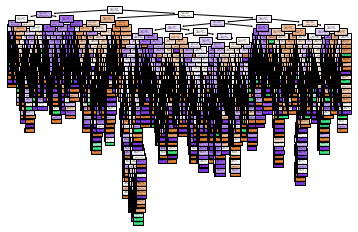

In [37]:
from sklearn import tree 
tree.plot_tree(model_decision_tree_classifier,filled=True)
plt.show()

In [56]:
class Node:
    def __init__(self):
        self.flag = False
        self.nodes = [None] * 256
        self.freq = [0] * 256
    def get_key(self, ch): return self.nodes[ord(ch)]
    def is_key(self, ch): return self.nodes[ord(ch)] is not None
    def set_key(self, ch):
        self.nodes[ord(ch)] = Node()
        self.freq[ord(ch)] = self.freq[ord(ch)] + 1 if self.is_key(ch) else 1
    def set_end(self): self.flag = True
    def is_end(self): return self.flag
class Trie:
    def __init__(self):
        self.root = Node()
    def push(self, data):
        cur_node = self.root
        for ch in data:
            if cur_node.is_key(ch): cur_node.freq[ord(ch)] += 1
            else: cur_node.set_key(ch)
            cur_node = cur_node.get_key(ch)
        cur_node.set_end()
    def search(self, data):
        cur_node = self.root
        for ch in data:
            if not cur_node.is_key(ch): return False
            cur_node = cur_node.get_key(ch)
        return cur_node.is_end()
    def prefix(self, data):
        cur_node = self.root
        prefix = ""
        for ch in data:
            if cur_node.is_key(ch):
                prefix += ch
                cur_node = cur_node.get_key(ch)
            else: break
        return prefix

In [62]:
trie = Trie()
opening_moves = chess_df['opening_eco']
matching_prefix = []
count_frequency = dict()
count_matches = set()
for move in opening_moves:
    trie.push(move)
for move in opening_moves:
    get_match = trie.prefix(move[:2])
    matching_prefix.append(get_match)
for i in range(len(matching_prefix)):
    count_matches.add(matching_prefix[i])
for i,value in enumerate(count_matches):
    count_frequency.setdefault(value,1)
for i in range(len(matching_prefix)):
    count_frequency[matching_prefix[i]] += 1
    
print(len(matching_prefix))
print(len(count_matches))
print(matching_prefix)
print(count_matches)
print(count_frequency)

from operator import itemgetter
print(sorted(count_frequency.items(),key=itemgetter(1),reverse=True))

20058
50
['D1', 'B0', 'C2', 'D0', 'C4', 'B2', 'D0', 'B0', 'C5', 'B0', 'A0', 'C0', 'C0', 'C0', 'C5', 'C5', 'C5', 'C5', 'C4', 'D0', 'C5', 'A4', 'B2', 'A2', 'B2', 'D0', 'C4', 'D0', 'D1', 'D0', 'B2', 'B5', 'B2', 'D2', 'B2', 'B0', 'D0', 'A4', 'B7', 'A2', 'B7', 'B2', 'B2', 'B7', 'B2', 'B2', 'B0', 'B2', 'B7', 'B0', 'C0', 'C2', 'A8', 'A2', 'A0', 'B2', 'C2', 'C4', 'C4', 'C4', 'C0', 'A4', 'A4', 'E1', 'C0', 'A0', 'A4', 'C0', 'D0', 'D0', 'A4', 'A4', 'C0', 'D0', 'C0', 'A4', 'D0', 'C0', 'D0', 'C0', 'D0', 'D0', 'A1', 'A0', 'D0', 'A4', 'C1', 'D0', 'D0', 'C0', 'D0', 'C0', 'D0', 'D0', 'A4', 'A4', 'D0', 'C5', 'D0', 'D0', 'C1', 'C4', 'C0', 'C4', 'D8', 'C0', 'C1', 'D3', 'D2', 'C0', 'D4', 'D2', 'A4', 'D3', 'C6', 'D0', 'D0', 'C6', 'C2', 'A4', 'A0', 'D0', 'B0', 'C5', 'B0', 'B2', 'C5', 'C5', 'C5', 'C5', 'B0', 'D0', 'C5', 'B0', 'B1', 'D0', 'B5', 'A2', 'B0', 'E2', 'C5', 'B0', 'D0', 'C5', 'C5', 'E1', 'B0', 'B0', 'C4', 'D3', 'C1', 'B0', 'C2', 'B0', 'B0', 'A4', 'B3', 'A5', 'B2', 'C5', 'C6', 'B9', 'C0', 'B5', 'B5', 